<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Introducción al aprendizaje computacional y la librería scikitlearn**

Este taller guiado tiene como objetivo hacer un primer acercamiento práctico acerca del aprendizaje computacional  con Python. Lo invito a interactuar y experimentar libremente con esta herramienta de aprendizaje. En el menú superior de click al botón copiar en Drive para crear una copia editable de este Notebook.

En este taller guiado veremos como:

* crear particiones de entrenamiento y prueba
* entrenar modelos para clasificación usando 2 algoritmos de Machine Learning
* evaluar el desempeño de modelos de clasificación (primera parte)


**Nota: Se sugiere que estudie este notebook luego de la primera clase del módulo.**

## **1. Importar librería sklearn**

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" alt = "Encabezado" width = "30%">  </img>

Scikit learn es una librería de Machine Learning o aprendizaje computacional para el lenguaje de Python. Está construida sobre NumPy, SciPy y matplotlib. Es una herramienta simple pero eficiente para el desarrollo de análisis predictivos. Tiene en su arsenal una gran cantidad de herramientas para hacer procesamiento, encontrar los mejores modelos y algoritmos variados para la construcción de modelos.

In [ ]:
!pip install -U scikit-learn
# !pip install sklearn

In [ ]:
# El nombre del módulo de Python es sklearn y no scikitlearn
import sklearn #

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.11.12
NumPy 2.0.2
Pandas 2.2.2
Matplotlib 3.10.0
Scikit-learn 1.6.1


Este taller guiado fue creado con las siguientes versiones:
*  *Python*: 3.7.12
*  *NumPy*:  1.19.5
*  *Pandas*:  1.1.5
*  *Matplotlib*:  3.2.2
*  *Scikit-learn*: 0.24.2

## **2. Cargar datos**

In [ ]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/Haroldgio28/Probabilidad_de_impago/main/data/case%202/Churn%20Modeling.csv'
    )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe()#.T

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.describe(include = 'object')# .T

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## **3. Partición del dataset en entrenamiento y prueba**

Con el objetivo de crear un modelo capaz de generalizar se procede a dividir los datos en dos subconjuntos. El conjunto de **entrenamiento** y **prueba**.

* El algoritmo aprenderá a partir de los datos de **entrenamiento**.
* Los datos de prueba serán usados para evaluar el desempeño del modelo, ya que son datos desconocidos para el algoritmo.

Usando una función de scikitlearn llamada train_test_split haremos un muestreo aleatorio para crear los dos subconjuntos en una sola linea de código.

En este primer ejercicio vamos crear un modelo de clasificación, el objetivo es predecir la especie a partir de mediciones del pétalo y sépalo . Para lograr esto, le daremos inicialmente al algoritmo información acerca de las medidas de las flores y de la especie a la cual pertenecen, durante el aprendizaje el algoritmo revelerá patrones y tendencias en los datos que le permitan llegar a la etiqueta de salida. Y luego usaremos datos desconocidos para el modelo - datos de prueba - para evaluar el desempeño del modelo.

**Nota:** Tenga presente que este es un ejercicio de aprendizaje supervisado ya que tenemos datos etiquetados, la columna Species es nuestra etiqueta. Al final de este módulo trabajaremos también con problemas de aprendizaje No supervisado.

In [ ]:
categorical_features = ['Geography',
                        'HasCrCard',
                        'IsActiveMember'
                        ]

numerical_features = ['CreditScore',  'Age', 'Tenure',
                      'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
X = df.drop(columns = ['Exited', 'Surname', 'Gender', 'RowNumber', 'CustomerId'])
y = df['Exited']

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

Dimensiones de X: (10000, 9)
Dimensiones de y: (10000,)


In [ ]:
# Ahora usaremos la función train test split que pertencen al paquete model_selection de sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, #primero pasamos los datos
    test_size = 0.3, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30%
    random_state = 11, # Estado aleatorio - Semilla - seed, # reproducibilidad
    stratify = y
)

X_train.head(2)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2882,551,France,37,3,0.0,2,1,1,50578.40
5401,654,France,47,10,0.0,2,1,0,170481.98


In [ ]:
print('Dimensiones de X de entrenamiento: {}'.format(X_train.shape))
print('Dimensiones de y de entrenamiento: {}\n'.format(y_train.shape))

print('Dimensiones de X de prueba: {}'.format(X_test.shape))
print('Dimensiones de y de prueba: {}'.format(y_test.shape))

Dimensiones de X de entrenamiento: (7000, 9)
Dimensiones de y de entrenamiento: (7000,)

Dimensiones de X de prueba: (3000, 9)
Dimensiones de y de prueba: (3000,)


In [ ]:
df['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037


In [ ]:
y_train.value_counts(normalize = True)

,proportion
Exited,
0,0.796286
1,0.203714


In [ ]:
y_test.value_counts(normalize = True)

,proportion
Exited,
0,0.796333
1,0.203667


## **4. Procesamiento**

In [ ]:
# Definir los transformadores para las columnas cualitativas y cuantitativas
categorical_transformer = Pipeline(steps=[
    ('dummy', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('estandarizar', StandardScaler())
])

In [ ]:
# Puedes incluir otros transformadores para variables cuantitativas si las tienes
# Por ejemplo, StandardScaler para normalizar las variables cuantitativas

# Combinar los transformadores en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features),
        # ('num', 'passthrough', numerical_featrures) # Si queremos dejar las variables numéricas sin transformar
        # Puedes agregar más transformadores aquí si es necesario
    ])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('dummy',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Geography', 'HasCrCard', 'IsActiveMember']),
                                ('num',
                                 Pipeline(steps=[('estandarizar',
                                                  StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary'])])

## **5. Vecinos más cercanos**

In [ ]:
# Cambiamos el clasificador a un DecisionTreeClassifier
k_classifier = KNeighborsClassifier(n_neighbors = 5)

# Crear el pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', k_classifier)])

#  Ahora puedes usar este pipeline para entrenar tu modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('dummy',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('num',
                                                  Pipeline(steps=[('estandarizar',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('model', KNeighborsClassifier())])

In [ ]:
y_train_predict = pipeline.predict(X_train)
y_test_predict = pipeline.predict(X_test)

print('Precisión entrenamiento: ', precision_score(y_train, y_train_predict))
print('Recall entrenamiento: ', recall_score(y_train, y_train_predict))
print('Accuracy entrenamiento: ', accuracy_score(y_train, y_train_predict))

print('\nPrecisión test: ',np.round(precision_score(y_test, y_test_predict),2))
print('Recall test: ',np.round(recall_score(y_test, y_test_predict),2))
print('Accuracy test: ',np.round(accuracy_score(y_test, y_test_predict),2))

Precisión entrenamiento:  0.8205666316894019
Recall entrenamiento:  0.5483870967741935
Accuracy entrenamiento:  0.8835714285714286

Precisión test:  0.66
Recall test:  0.46
Accuracy test:  0.84


In [ ]:
recall_train = []
accuracy_train = []

recall_test = []
accuracy_test = []

for i in np.arange(1,25):
  # Cambiamos el clasificador a un DecisionTreeClassifier
  k_classifier = KNeighborsClassifier(n_neighbors = i)

# Crear el pipeline completo
  pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', k_classifier)])

#  Ahora puedes usar este pipeline para entrenar tu modelo
  pipeline.fit(X_train, y_train)

  y_train_predict = pipeline.predict(X_train)
  y_test_predict = pipeline.predict(X_test)

  recall_train.append(recall_score(y_train, y_train_predict))
  accuracy_train.append(accuracy_score(y_train, y_train_predict))

  recall_test.append(recall_score(y_test, y_test_predict))
  accuracy_test.append(accuracy_score(y_test, y_test_predict))

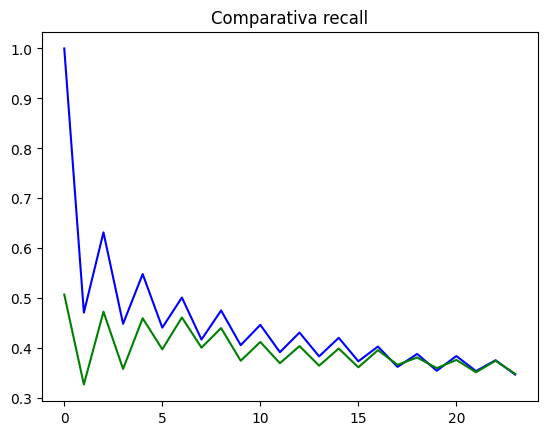

In [ ]:
plt.plot(recall_train, color='b')
plt.plot(recall_test, color='g')

plt.title('Comparativa recall')
plt.show()

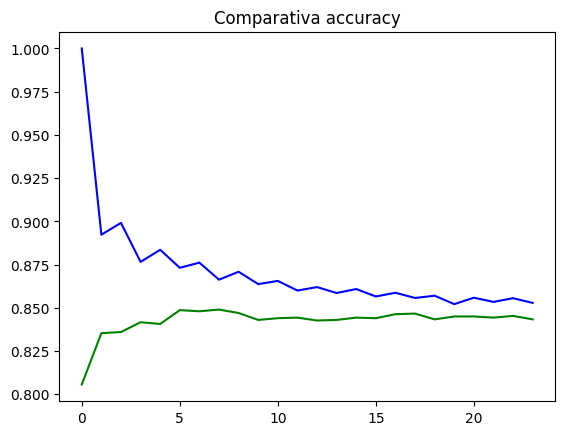

In [ ]:
plt.plot(accuracy_train, color='b')
plt.plot(accuracy_test, color='g')

plt.title('Comparativa accuracy')
plt.show()

* Random forest

In [ ]:
from tqdm import tqdm

cantidad_arboles = np.linspace(10,500,num= 10,dtype = 'int')

recall_prueba_lista = []
precision_prueba_lista = []

for arbol in tqdm(cantidad_arboles):

  clf = RandomForestClassifier(random_state=11,
                               max_depth = 30,
                               n_estimators = arbol,
                               max_samples = 0.75,
                               class_weight='balanced' #balanced_subsample #balanced
                                )

  # Crear el pipeline completo
  pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', clf)])

  #  Ahora puedes usar este pipeline para entrenar tu modelo
  pipeline_dt.fit(X_train, y_train)

  y_pred_test = pipeline_dt.predict(X_test)

  # medimos metricas
  precision = precision_score(y_test,y_pred_test)
  precision_prueba_lista.append(precision)

  recall = recall_score(y_test,y_pred_test)
  recall_prueba_lista.append(recall)

100%|██████████| 10/10 [00:25<00:00,  2.59s/it]


Text(0.5, 1.0, 'Precisión')

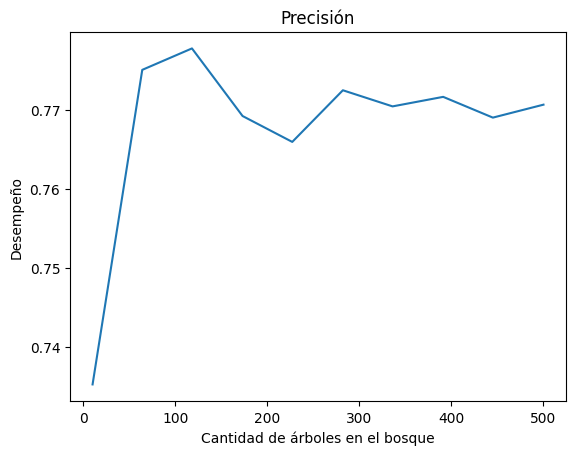

In [ ]:
plt.plot(cantidad_arboles, precision_prueba_lista)
plt.xlabel('Cantidad de árboles en el bosque')
plt.ylabel('Desempeño')
plt.title('Precisión')

Text(0.5, 1.0, 'Recall')

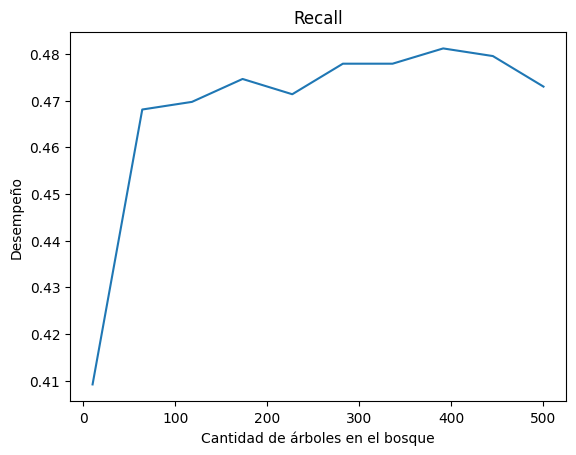

In [ ]:
plt.plot(cantidad_arboles, recall_prueba_lista)
plt.xlabel('Cantidad de árboles en el bosque')
plt.ylabel('Desempeño')
plt.title('Recall')

In [ ]:
pd.DataFrame(zip(clf.feature_importances_, X_train.columns)).rename(columns={1:'Variable', 0:'Importancia'}).sort_values(by=['Importancia'], ascending=False)

,Importancia,Variable
8,0.258865,EstimatedSalary
7,0.141164,IsActiveMember
1,0.023977,Geography
5,0.021104,NumOfProducts
6,0.018549,HasCrCard
0,0.011868,CreditScore
3,0.010514,Tenure
2,0.010293,Age
4,0.010098,Balance


In [ ]:
# Xgboost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
# https://xgboost.readthedocs.io/en/stable/parameter.html

scale_pos_weight = np.round(sum(np.where(df["Exited"] == 0, 1, 0)) / sum(df["Exited"]), 0)

# 3. Crea una instancia del clasificador XGBoost.
# Ajusta los hiperparámetros según sea necesario. Consulta la documentación para más información.
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    objective='binary:logistic',  # Para clasificación binaria
    scale_pos_weight = scale_pos_weight
)

  # Crear el pipeline completo
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', xgb_model)])

  #  Ahora puedes usar este pipeline para entrenar tu modelo
pipeline_xgb.fit(X_train, y_train)

# 5. Haz predicciones en el conjunto de prueba.
y_pred = pipeline_xgb.predict(X_test)

# 6. Evalúa el modelo.
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Exactitud: {accuracy}")
print(f"Recall: {recall}")
print(f"Precisión: {precision}")

Exactitud: 0.8006666666666666
Recall: 0.7610474631751227
Precisión: 0.5070883315158125


In [ ]:
# Ejemplo de sampling - muestreo
# ejemplo de muestreo de etiqueta negativa equivalente a N etiquetas positivas

In [ ]:
n_etiquetas_positivas = sum(df['Exited'])
df_sample_negativas = df[df['Exited'] == 0].sample(n=n_etiquetas_positivas, random_state=11)
# sampleo de positivas con .sample(n=proporcion de positivas que quiero incluir, replace= True (para bootstraping), random_state=11)
df_sample_positivas = df[df['Exited'] == 1]
df_balanced = pd.concat([df_sample_negativas, df_sample_positivas])
df_balanced['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.5
1,0.5


In [ ]:
X = df_balanced.drop(columns = ['Exited', 'Surname', 'Gender', 'RowNumber', 'CustomerId'])
y = df_balanced['Exited']

print('Dimensiones de X: {}'.format(X.shape))
print('Dimensiones de y: {}'.format(y.shape))

# Ahora usaremos la función train test split que pertencen al paquete model_selection de sklearn

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, #primero pasamos los datos
    test_size = 0.2, # Determinamos la porción de los datos que se usará para probar el modelo, en este caso 30%
    random_state = 11, # Estado aleatorio - Semilla - seed, # reproducibilidad
    stratify = y
)

Dimensiones de X: (4074, 9)
Dimensiones de y: (4074,)


In [ ]:
# Cambiamos el clasificador a un DecisionTreeClassifier
k_classifier = KNeighborsClassifier(n_neighbors = 5)

# Crear el pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', k_classifier)])

#  Ahora puedes usar este pipeline para entrenar tu modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('dummy',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Geography', 'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('num',
                                                  Pipeline(steps=[('estandarizar',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary'])])),
                ('model', KNeighborsClassifier())])

In [ ]:
y_train_predict = pipeline.predict(X_train)
y_test_predict = pipeline.predict(X_test)

print('Precisión entrenamiento: ', precision_score(y_train, y_train_predict))
print('Recall entrenamiento: ', recall_score(y_train, y_train_predict))
print('Accuracy entrenamiento: ', accuracy_score(y_train, y_train_predict))

print('\nPrecisión test: ',np.round(precision_score(y_test, y_test_predict),2))
print('Recall test: ',np.round(recall_score(y_test, y_test_predict),2))
print('Accuracy test: ',np.round(accuracy_score(y_test, y_test_predict),2))

Precisión entrenamiento:  0.8405612244897959
Recall entrenamiento:  0.809085328422345
Accuracy entrenamiento:  0.8278613071494323

Precisión test:  0.78
Recall test:  0.72
Accuracy test:  0.76


In [ ]:
recall_train = []
accuracy_train = []

recall_test = []
accuracy_test = []

for i in np.arange(1,25):
  # Cambiamos el clasificador a un DecisionTreeClassifier
  k_classifier = KNeighborsClassifier(n_neighbors = i)

# Crear el pipeline completo
  pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', k_classifier)])

#  Ahora puedes usar este pipeline para entrenar tu modelo
  pipeline.fit(X_train, y_train)

  y_train_predict = pipeline.predict(X_train)
  y_test_predict = pipeline.predict(X_test)

  recall_train.append(recall_score(y_train, y_train_predict))
  accuracy_train.append(accuracy_score(y_train, y_train_predict))

  recall_test.append(recall_score(y_test, y_test_predict))
  accuracy_test.append(accuracy_score(y_test, y_test_predict))

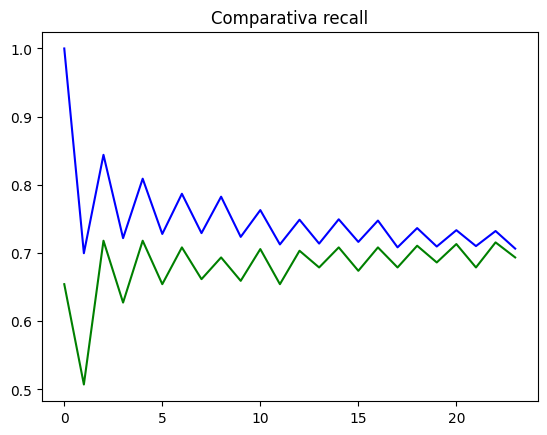

In [ ]:
plt.plot(recall_train, color='b')
plt.plot(recall_test, color='g')

plt.title('Comparativa recall')
plt.show()

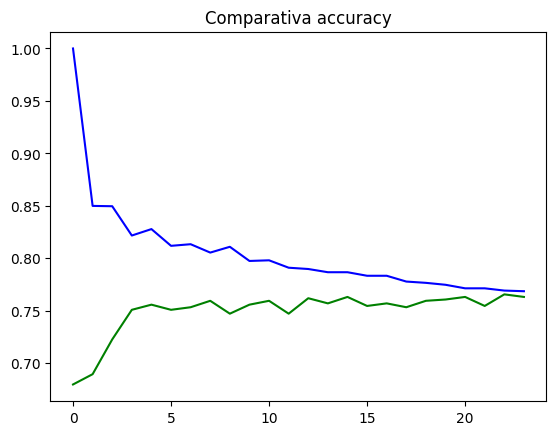

In [ ]:
plt.plot(accuracy_train, color='b')
plt.plot(accuracy_test, color='g')

plt.title('Comparativa accuracy')
plt.show()